## Importing Modules and Libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth',None)
pd.options.display.float_format = '{:20,.2f}'.format 

warnings.filterwarnings('ignore')

In [2]:
#  classification report and confusion matrix for measuring scores
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, recall_score

# StandardScaler for Preprocessing
from sklearn.preprocessing import StandardScaler

#PCA module
from sklearn.decomposition import PCA

# visualization Packages
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot, graphviz

# Other sklearn packages
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
df=pd.read_csv('telecom_churn_data.csv')
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [5]:
print("Shape of the dataframe:",df.shape)

Shape of the dataframe: (99999, 226)


In [6]:
df.info(verbose=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
#checking how the data is spread
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [8]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
# column count
print("ID cols: ",len(id_cols))
print("Date cols:",len(date_cols))
print("Numeric cols:",len(num_cols))
print("Category cols:", len(cat_cols))

ID cols:  2
Date cols: 12
Numeric cols: 204
Category cols: 8


  **********************************************************************  

# DATA CLEANING

In [10]:
# Finding the missing values%
pd.set_option('display.max_rows', None)
telecom_null_check = 100*df.isnull().sum()/len(df)
df_01 = pd.DataFrame(telecom_null_check)
df_01.rename(columns={0:'Null_Percentage'}, inplace=True)
df_01.sort_values('Null_Percentage', ascending=False)

,Null_Percentage
arpu_3g_6,74.85
night_pck_user_6,74.85
total_rech_data_6,74.85
arpu_2g_6,74.85
max_rech_data_6,74.85
fb_user_6,74.85
av_rech_amt_data_6,74.85
date_of_last_rech_data_6,74.85
count_rech_2g_6,74.85
count_rech_3g_6,74.85


#### There are few columns with 74.85 % of missing values. In the process of cleaning the data let us consider columns with less than 70% data missing and drop the rest.

In [11]:
# Null columns list
Missing_Vals_Column_70=list(df_01.index[df_01['Null_Percentage'] > 70])
print("Null Column List:",Missing_Vals_Column_70)

Null Column List: ['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


#### However, we'll leave out the Max_recharge, Total_Recharge, and Average Recharge Amount columns because they might offer us some useful information.

In [12]:
# Removing the columns as per above condition
Missing_Vals_Column_70=df.columns[round(100*df.isnull().sum()/len(df),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
df=df.drop(Missing_Vals_Column_70,axis=1)
print("Shape of the Data set after droping missing values:",df.shape)

Shape of the Data set after droping missing values: (99999, 198)


#### The numbers of columns reduced from 226 to 198 after removing the columns with >70% missing values

In [13]:
# ReChecking missing %
def NULL_CHECK(X):
    pd.set_option('display.max_rows', None)
    telecom_null_check_2 = 100*X.isnull().sum()/len(X)
    df = pd.DataFrame(telecom_null_check_2)
    df.rename(columns={0:'Null_Percentage'}, inplace=True)
    return df.sort_values('Null_Percentage', ascending=False)



In [14]:
NULL_CHECK(df)

,Null_Percentage
av_rech_amt_data_6,74.85
max_rech_data_6,74.85
total_rech_data_6,74.85
max_rech_data_7,74.43
total_rech_data_7,74.43
av_rech_amt_data_7,74.43
max_rech_data_9,74.08
total_rech_data_9,74.08
av_rech_amt_data_9,74.08
max_rech_data_8,73.66


#### As you can see from the table above, the values for the recharge columns are nearly identical to one another. Since the minimum value is 1, we can assume that the NA values are equal to 0, which means that the customer did not perform a recharge.

In [15]:
#Imputing 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [16]:
df[zero_impute_rch] = df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [17]:
print(df[zero_impute_rch].isnull().sum()*100/df.shape[1])

total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
total_rech_data_9                    0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
av_rech_amt_data_8                   0.00
av_rech_amt_data_9                   0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
max_rech_data_8                      0.00
max_rech_data_9                      0.00
dtype: float64


In [18]:
# Dropping Unnecessary columns i.e. ID and Date columns. 
Dropping=id_cols + date_cols
initial_cols = df.shape[1]
Cols_to_drop=[col for col in Dropping if col in df.columns]
df=df.drop(Cols_to_drop,axis=1)
df.shape

(99999, 188)

#### Since the columns that still have null values are those for duration for the different types of calls made, a value of 0 indicates that the customer did not make any calls of that particular type. 

In [19]:
# imputing the remaining null columns as 0. 
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)


In [20]:
NULL_CHECK(df)

,Null_Percentage
loc_og_t2o_mou,0.00
ic_others_8,0.00
spl_ic_mou_7,0.00
spl_ic_mou_8,0.00
spl_ic_mou_9,0.00
isd_ic_mou_6,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00


**Now we need to work on some columns with 0 standard deviation.**

In [21]:
# Checking value_counts for the following columns
print(df.loc_og_t2o_mou.value_counts(dropna= False))
print(df.std_og_t2o_mou.value_counts(dropna= False))
print(df.loc_ic_t2o_mou.value_counts(dropna= False))

0.00    99999
Name: loc_og_t2o_mou, dtype: int64
0.00    99999
Name: std_og_t2o_mou, dtype: int64
0.00    99999
Name: loc_ic_t2o_mou, dtype: int64


#### These columns all contain missing values and 0 values. It cannot be categorised because it is a minutes of usage column. Even if we use the mean to approximate these missing values, the median imputation value will still be 0. As a result, these columns will have zero variance and a mean of 0. These columns' Information Value will be 0. Consequently, removing these columns would be a wise move.

In [22]:
# Dropping above mentioned columns
df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'], axis= 1, inplace= True)

In [23]:
df.shape

(99999, 185)

In [24]:
## unique values count in all the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)

In [25]:
unique_nan(df)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

In [26]:
# Dropping columns with only 1 unique value as they dont impact the analysis
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
        
cols

df = df.drop(cols,1)
df.shape

(99999, 177)

In [27]:
NULL_CHECK(df)

,Null_Percentage
arpu_6,0.00
std_ic_t2t_mou_7,0.00
isd_ic_mou_7,0.00
isd_ic_mou_8,0.00
isd_ic_mou_9,0.00
ic_others_6,0.00
ic_others_7,0.00
ic_others_8,0.00
ic_others_9,0.00
total_rech_num_6,0.00


Now there are 0 missing values in the data

# Data Preparation.

### Find the Average rechanrge for 6 and 7th month
#### avg_recharge_6_7 = recharge amount of 6 + 7 month/ 2

In [28]:
# checking if the null values in same row.
flag = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', flag.any())
flag = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', flag.any())
flag = df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('Aug :', flag.any())

June : False
July : False
Aug : False


#### False flag indicate that the null values are present in the same row for both the columns of the respective month.

In [29]:
df['avg_rech_6_7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

#### Whoever recharged with an amount greater than or equal to X, where X is greater than the 70% mark of the typical recharge amount during the first two months or more should be considered as a High Value customer. 

In [30]:
#70th percentile for the new column
quantile_70=df['avg_rech_6_7'].quantile(0.7)
quantile_70

368.5

In [31]:
# Segregate the customers HIGH-VALUE Customers with more than quantile_70
df=df[df['avg_rech_6_7'] >= quantile_70]
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00"
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.0

**Checking if rows have any missing values**

In [32]:
# counting the rows having more than 50% missing values.
Half_Missing_rows=df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
Half_Missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [33]:
print("Current shape of the Dataframe:",df.shape)

Current shape of the Dataframe: (30011, 178)


## Identifying CHURNERS

Create a new column called Prob_Churn where if the value is 1 he/she can be churned, else 0. 

Segregating criteria is No calls be it incoming or Outgoing and did not use the databalance in the churn phase.

this is done using the columns - total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [34]:
df['Prob_Churn']= np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [35]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Prob_Churn
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,

In [36]:
df['Prob_Churn'].value_counts()

0    27418
1     2593
Name: Prob_Churn, dtype: int64

### We can drop the columns for 9th month because we already got the churn clients list.

In [37]:
# So we need to get the list of coumns which ends with '_9'
columns_9 = [col for col in df.columns.to_list() if '_9' in col]
print(columns_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [38]:
# droping unnecessary churn month columns
DF = df.drop(columns_9, axis=1)

In [39]:
# Dropping sep_vbc_3g column
DF = DF.drop('sep_vbc_3g', axis=1)

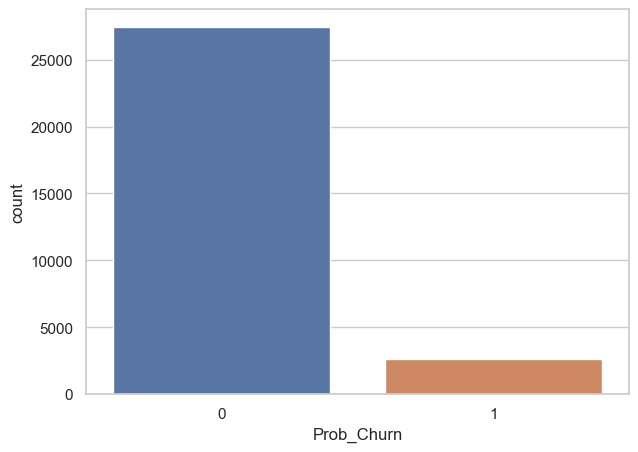

Mean Churn rate: 8.64


In [40]:
# plotting the Churn Data
plt.figure(figsize= [7,5])
sns.countplot(data = DF, x = "Prob_Churn")

plt.show()
# Checking for the CHURN rate
print("Mean Churn rate:",round(100*(DF['Prob_Churn'].mean()),2))

8.6% customers have churned and there is clear indication of class imbalance, SMOTE needs to be used to deal with this situation. 

## Dealing with Outliers 

In [41]:
# changing to Object data type to deal with outliers

DF['Prob_Churn'] = DF['Prob_Churn'].astype(object)

In [42]:
# get the columns with numerical values to deal with outliers
num_cols = DF.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [43]:
#Descriptive statistics 
DF.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.03,304.34,267.60,417.93,423.92,375.02,17.41,13.52,13.26,29.32,22.04,21.47,94.68,95.73,87.14,181.28,181.27,167.59,6.98,7.10,6.49,1.57,1.86,1.71,282.95,284.11,261.23,189.75,199.88,172.20,203.10,213.41,179.57,2.01,2.03,1.79,394.87,415.33,353.56,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.75,70.31,65.94,159.61,160.81,153.63,15.60,16.51,14.71,243.97,247.64,234.28,16.23,16.89,15.05

In [44]:
# cleaning the outliers in the extremes
for col in num_cols: 
    q1 = DF[col].quantile(0.10)
    q3 = DF[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    new_DF = DF.loc[(DF[col] > range_low) & (DF[col] < range_high)]

new_DF.shape

(29700, 135)

## Creating a new column - decrease_recharge_action
Indicating if the # of recharges decrease for a customer when compared to good phase in action phase.

In [45]:
# Avg recharge number at action phase in two months(7 and 8) in action phase
new_DF['avg_recharge_num_action'] = (new_DF['total_rech_num_7'] + new_DF['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
new_DF['diff_rech_num'] = new_DF['avg_recharge_num_action'] - new_DF['total_rech_num_6']

In [46]:
# Checking if # of recharges decrease for a customer , 1=Yes, 0=No
new_DF['decrease_recharge_action'] = np.where((new_DF['diff_rech_num'] < 0), 1, 0)

In [47]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Prob_Churn,avg_recharge_num_action,diff_rech_num,decrease_recharge_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,

## Creating a new column dec_avg_revenue_per_customer_action

Indicates if there is decrease in average revenue per customer when compared to good phasein action phase or not

In [48]:
# average ARUP in action phase in two months(7 and 8) in action phase
new_DF['avg_arpu_action'] = (new_DF['arpu_7'] + new_DF['arpu_8'])/2
# Difference of good and action phase ARPU
new_DF['diff_arpu'] = new_DF['avg_arpu_action'] - new_DF['arpu_6']

In [49]:
# Checking whether decrease in average revenue per customer, 1=Yes, 0=No
new_DF['dec_avg_revenue_per_customer_action'] = np.where((new_DF['diff_arpu'] < 0), 1, 0)

In [50]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Prob_Churn,avg_recharge_num_action,diff_rech_num,decrease_recharge_action,avg_arpu_action,diff_arpu,dec_avg_revenue_per_customer_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,

### create a new column decrease_recharge_amt_action

Indicats if there is any decrease in recharge amount of customers when compared to good phase in action phase.

In [51]:
# Avg recharge amount in action phase for two months(7 and 8) in action phase
new_DF['avg_rech_amt_action'] = (new_DF['total_rech_amt_7'] + new_DF['total_rech_amt_8'])/2
# Difference of action phase recharge amount and good phase recharge amount
new_DF['diff_rech_amt'] = new_DF['avg_rech_amt_action'] - new_DF['total_rech_amt_6']

In [52]:
# Checking if any decrease in recharge amount of customers, 1=Yes, 0=No
new_DF['decrease_recharge_amt_action'] = np.where((new_DF['diff_rech_amt'] < 0), 1, 0) 

In [53]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Prob_Churn,avg_recharge_num_action,diff_rech_num,decrease_recharge_action,avg_arpu_action,diff_arpu,dec_avg_revenue_per_customer_action,avg_rech_amt_action,diff_rech_amt,decrease_recharge_amt_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.

## Creating the decrease_MOU_action

Indicating if Minutes of Usages for the customers when compared to good phase is decreased in action phase or not

In [54]:
# Total mou at good phase incoming and outgoing
new_DF['total_mou_good'] = (new_DF['total_og_mou_6'] + new_DF['total_ic_mou_6'])
# Avg. mou at action phase in two months(7 and 8) in action phase
new_DF['avg_mou_action'] = (new_DF['total_og_mou_7'] + new_DF['total_og_mou_8'] + new_DF['total_ic_mou_7'] + new_DF['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action
new_DF['diff_mou'] = new_DF['avg_mou_action'] - new_DF['total_mou_good']


In [55]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
new_DF['decrease_MOU_action'] = np.where((new_DF['diff_mou'] < 0), 1, 0)

In [56]:
new_DF.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Prob_Churn,avg_recharge_num_action,diff_rech_num,decrease_recharge_action,avg_arpu_action,diff_arpu,dec_avg_revenue_per_customer_action,avg_rech_amt_action,diff_rech_amt,decrease_recharge_amt_action,total_mou_good,avg_mou_action,diff_mou,decrease_MOU_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,492.85,205.67,593.26,501.76,108

-----------------------------------------------------------------------------------------------------------------

## EDA

**Univariate Analysis**

Churn rate on the basis whether the customer decreased her/his MOU in action month

In [57]:
# Converting churn column to int in order to do aggfunc in the pivot table
new_DF['Prob_Churn'] = new_DF['Prob_Churn'].astype('int64')

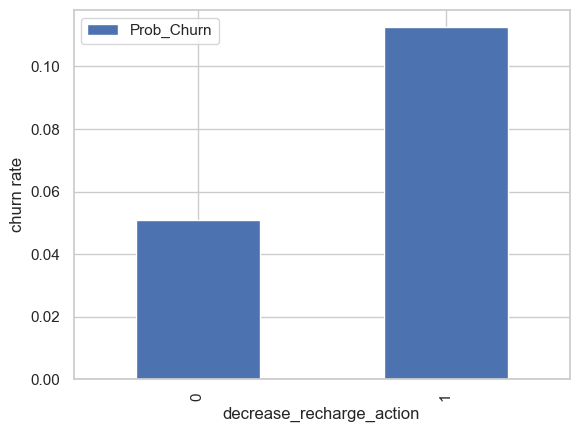

In [58]:
new_DF.pivot_table(values='Prob_Churn', index='decrease_recharge_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Churn rate on the basis whether the customer decreased her/his number of recharge in action month

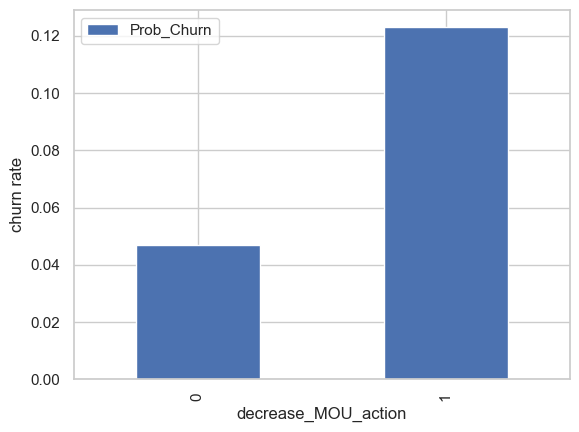

In [59]:
new_DF.pivot_table(values='Prob_Churn', index='decrease_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the customers who had a higher churn rate were those whose minutes of usage (mou) had decreased in the action phase as opposed to the good phase.

-------------------------------------------------------------------------------------------------------


Churn rate based on whether a customer reduced their amount of recharge during the current month

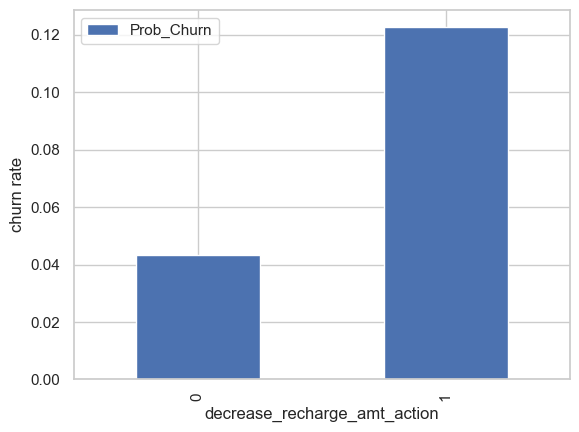

In [60]:
new_DF.pivot_table(values='Prob_Churn', index='decrease_recharge_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

This behaviour is also evident. Customers with lower recharge amounts in the action phase compared to the good phase have higher churn rates.

-----------------------------------------------------------------------------------------------------------------------

Customers have a higher attrition rate, and fewer recharges occur during the action phase than during the good phase. The three plots above demonstrate that customers do not increase their monthly recharge during the action phase.

-------------------------------------------------------------------------------------------------------------------------

Analysis of the minutes of usage MOU (churn and not churn) in the action phase

In [61]:
# Creating churn dataframe
Data_churn = new_DF[new_DF['Prob_Churn'] == 1]
# Creating not churn dataframe
Data_Non_churn = new_DF[new_DF['Prob_Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

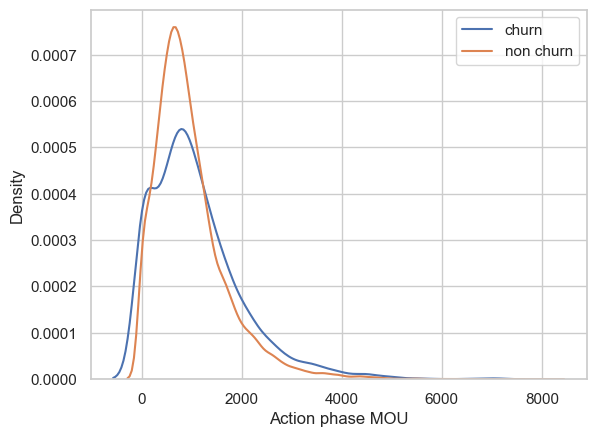

In [62]:
# Distribution plot
ax = sns.distplot(Data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(Data_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

The majority of the churn customers' minutes of usage (MOU) fall between 0 and 2500. The chance of churn is lower the higher the MOU.

### Bivariate Analysis

Analising recharge amount and number of recharge in action month

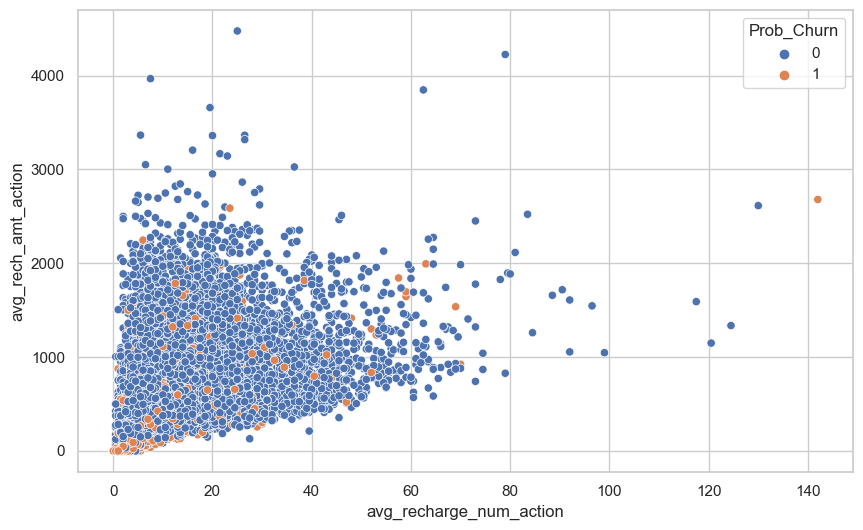

In [63]:
plt.figure(figsize=(10,6))
fig = sns.scatterplot(data=new_DF,x='avg_recharge_num_action',y='avg_rech_amt_action', hue='Prob_Churn')

The pattern shown above indicates that there is nearly a perfect correlation between the amount and the number of recharges. Greater is the quantity of recharged than the number of recharges.

------------------------------------------------------------------------------------------------------------------------------------------


Analizing churn rate WRT the decreasing recharge amount and number of recharge during the action phase

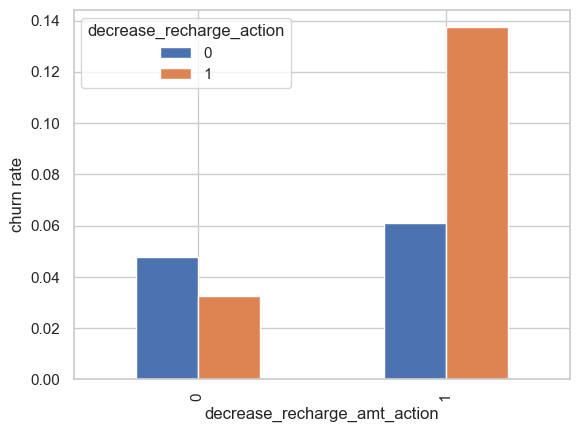

In [64]:
new_DF.pivot_table(values='Prob_Churn', index='decrease_recharge_amt_action', columns='decrease_recharge_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The above plot shows that customers whose number and amount of recharges have decreased during the action phase compared to the good phase have a higher churn rate.

In [65]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = new_DF
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="Prob_Churn",hue="Prob_Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="Prob_Churn",hue="Prob_Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="Prob_Churn",hue="Prob_Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [66]:
recharge_amnt_columns =  DF.columns[DF.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

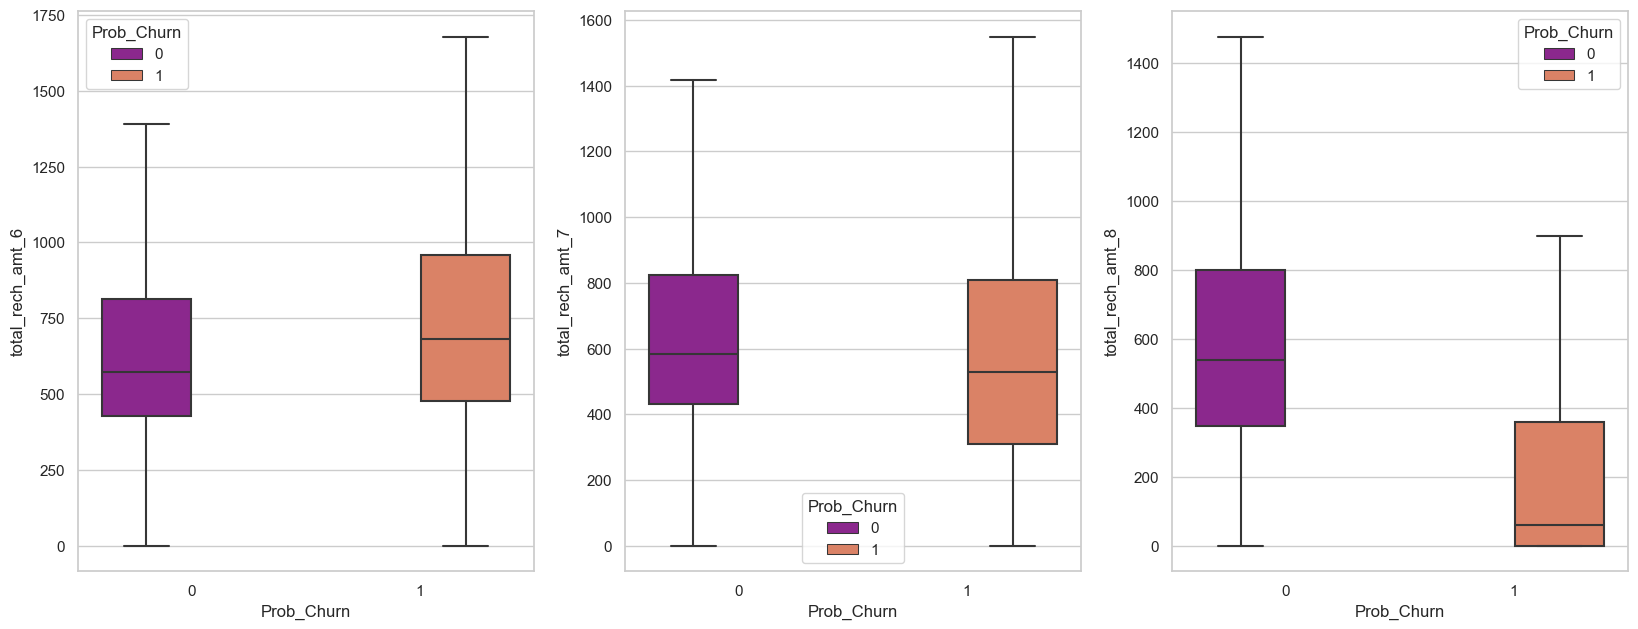

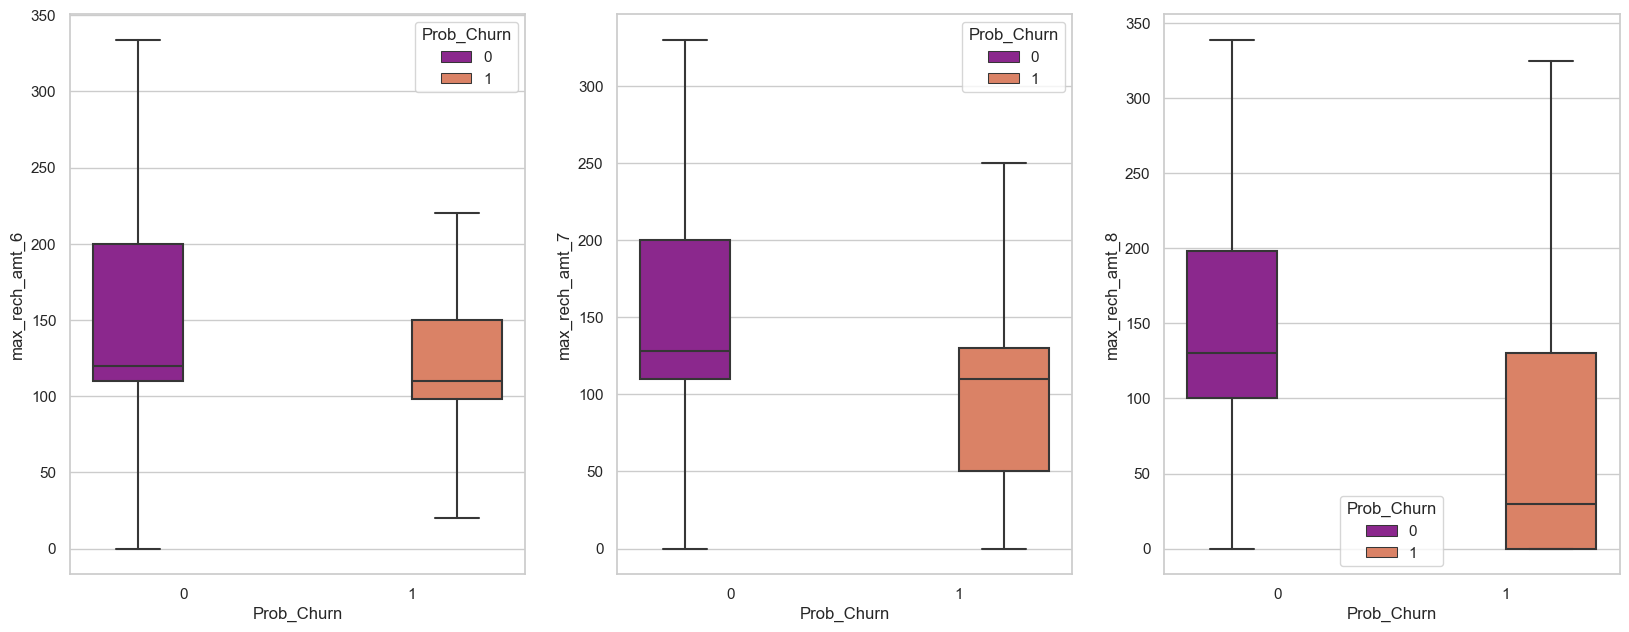

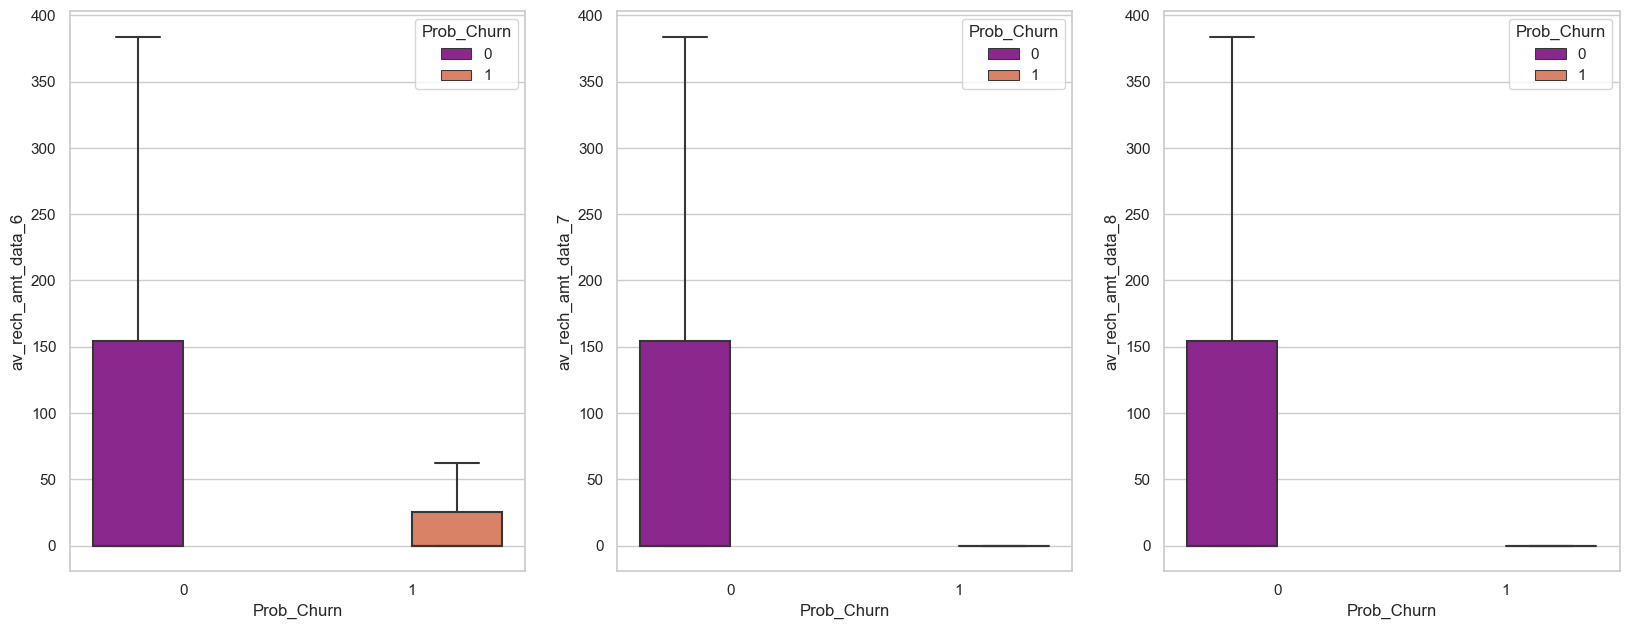

In [67]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

***From the above plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.***

In [68]:
# Dropping the Some of the Derived columns that are not needed furthur.

new_DF = new_DF.drop(['total_mou_good','avg_mou_action','diff_mou','avg_recharge_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [69]:
#function for box plot
def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [70]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in new_DF.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'decrease_recharge_action',
 'decrease_recharge_amt_action']

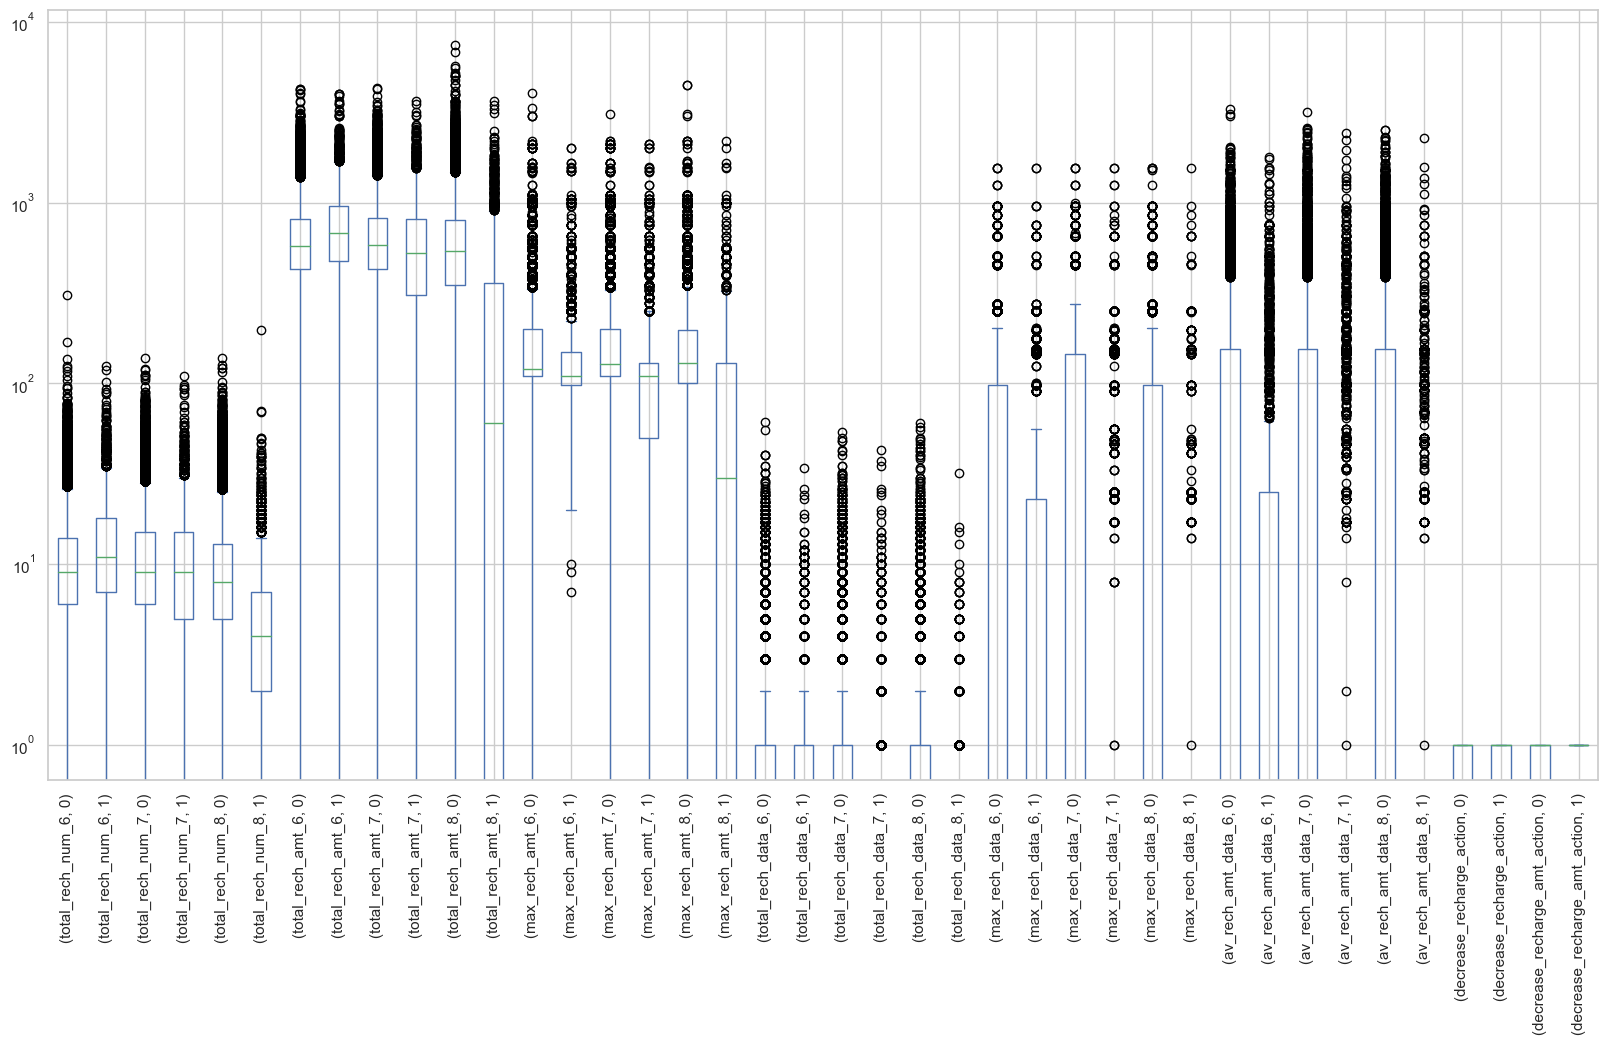

In [71]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

new_DF.pivot(columns='Prob_Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
 

--------------------------------------------------------------------------------------------------------------------------------------


# Train Test Split

In [72]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = new_DF.drop(['Prob_Churn'], axis=1)

# Putting target variable to y
y = new_DF.pop('Prob_Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

**Dealing with Class Imbalance using SMOTE** (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE

In [74]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state=42)

# Fittign SMOTE to the train set
X_train, y_train = smt.fit_resample(X_train, y_train)

In [75]:
X_train.shape 

(38004, 137)

### **Scaling numeric features**

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [76]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [77]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_recharge_action,dec_avg_revenue_per_customer_action,decrease_recharge_amt_action,decrease_MOU_action
0,"1,409.37","1,052.63","1,674.24",453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.00,0.00,972.48,950.49,"1,088.03",4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,0.00,"1,163.51","1,086.31","1,176.66",268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,"1,054.93","1,091.14",764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,"1,099.96","1,154.76",831.43,0.00,0.00,0.00,0.00,0.00,6.13,0.00,0.00,0.00,14.00,10.00,13.00,"1,760.00","1,048.00","1,970.00",250.00,250.00,250.00,0.00,200.00,130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,791.00",0.00,0.00,0.00,1,1,1,1
1,388.90,533.34,675.71,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.00,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.00,0.00,0.00,0.15,5.01,0.00,0.00,0.00,0.00,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,2.00,6.00,4.00,379.00,532.00,"1,034.00",379.00,250.00,400.00,0.00,27.00,350.00,0.00,1.00,1.00,0.00,145.00,154.00,0.00,145.00,154.00,0.00,1.84,3.87,0.00,478.99,127.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,372.00",38.22,114.06,236.82,0,0,0,0
2,19.42,597.25,709.65,3.68,"1,031.28","1,018.29",24.89,927.86,"1,043.43",0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.00,0.00,1.08,19.78,10.29,3.63,"1,028.09","1,015.04",18.39,907.38,"1,028.61",0.00,0.00,0.00,22.03,"1,935.48","2,043.66",0.00,0.00,0.00,5.46,6.21,8.86,0.00,0.00,0.00,28

****Scaling the TRAIN data set****

In [79]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns 
binary_cols_to_remove=['decrease_MOU_action','decrease_recharge_action','decrease_recharge_amt_action','dec_avg_revenue_per_customer_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))


Total scalable columns:  137
Scalable cols after removing :  133


In [80]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [81]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_recharge_action,dec_avg_revenue_per_customer_action,decrease_recharge_amt_action,decrease_MOU_action
0,2.42,1.62,3.55,0.23,0.11,1.02,0.81,0.89,1.40,0.52,0.29,1.41,0.66,0.38,1.98,1.56,1.16,2.24,1.92,2.47,2.81,-0.31,-0.24,-0.09,-0.22,-0.20,-0.21,2.22,2.31,3.15,-0.53,-0.50,-0.37,-0.16,-0.22,-0.13,-0.15,-0.14,-0.04,-0.48,-0.50,-0.34,-0.12,-0.11,-0.07,-0.25,-0.36,-0.26,-0.36,-0.02,-0.01,0.62,0.65,1.27,1.65,2.02,2.09,2.99,3.07,2.14,0.19,0.01,-0.23,2.98,3.17,2.46,-0.17,-0.20,-0.20,0.04,0.34,0.42,0.06,-0.14,0.29,-0.05,0.14,0.27,2.53,2.76,2.16,-0.36,-0.14,-0.16,-0.18,-0.16,-0.03,-0.09,-0.09,-0.08,0.09,-0.17,0.60,2.66,1.07,3.53,0.60,0.56,0.93,-0.78,0.88,0.59,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,0.80,-0.27,-0.29,-0.29,1,1,1,1
1,-0.60,0.02,0.82,-0.66,-0.62,-0.37,-0.48,-0.35,0.05,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.33,-0.30,-0.13,0.20,0.42,0.77,0.32,-0.27,0.54,-0.20,-0.20,-0.21,-0.07,0.06,0.43,-0.52,-0.50,-0.32,-0.56,-0.51,-0.34,-0.15,-0.14,0.28,-0.76,-0.71,-0.43,-0.12,-0.11,-0.07,-0.35,-0.11,-0.26,-0.36,-0.02,-0.01,-0.78,-0.64,-0.17,-0.38,-0.34,-0.25,0.23,2.40,0.89,0.37,1.53,0.62,0.05,1.72,0.58,-0.21,-0.17,-0.04,-0.33,-0.26,-0.14,-0.14,-0.14,0.05,-0.37,-0.30,-0.12,-0.14,1.33,0.42,-0.36,-0.14,-0.16,-0.17,-0.16,-0.13,-0.09,-0.09,-0.08,-1.13,-0.61,-0.47,-0.80,-0.22,1.39,1.45,0.56,1.99,-0.78,-0.49,2.53,-0.41,0.07,0.18,-0.48,1.01,1.42,-0.45,0.42,0.69,-0.26,-0.24,-0.18,-0.29,0.39,-0.05,-0.29,-0.28,3.36,-0.29,-0.29,-0.28,-0.29,1.78,-0.24,-0.16,-0.15,-0.12,1.45,-0.14,0.05,0.44,0,0,0,0
2,-1.69,0.21,0.91,-0.68,1.61,2.13,-0.85,1.14,1.97,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.36,-0.32,-0.28,-0.67,-0.58,-0.51,-0.31,-0.29,-0.27,0.49,-0.20,-0.21,-0.68,-0.59,-0.51,-0.53,1.96,2.62,-0.53,1.55,2.67,-0.15,-0.14,-0.12,-0.74,2.43,3.51,-0.12,-0.11,-0.07,-0.05,-0.05,0.21,-0.36,-0.02,-0.01,-1.05,1.99,2.76,-0.39,-0.36,-0.25,-0.58,-0.58,-0.41,-0.31,-0.30,-0.27,-0.64,-0.63,-0.44,-0.25,-0.23,-0.20,-0.18,0.35,-0.18,-0.14,-0.14,-0.1

****Scaling the TEST DATA set****

We do not fit scaler on the TEST data set. We can only transform TEST set.

In [82]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_recharge_action,dec_avg_revenue_per_customer_action,decrease_recharge_amt_action,decrease_MOU_action
2722,0.15,0.43,1.03,1.98,2.60,3.37,-0.37,-0.40,-0.22,-0.22,-0.24,-0.24,-0.28,-0.29,-0.29,0.10,-0.18,0.21,-0.05,-0.03,-0.18,-0.28,-0.29,-0.19,-0.22,-0.20,-0.21,0.02,-0.15,0.01,2.11,2.98,3.77,-0.30,-0.35,-0.09,-0.15,-0.14,-0.12,1.27,1.76,2.46,-0.12,-0.11,-0.07,-0.29,-0.12,-0.06,0.15,-0.02,-0.01,1.22,1.57,2.11,0.23,0.12,0.67,-0.43,0.03,-0.34,-0.28,-0.30,-0.23,-0.25,0.04,0.05,0.09,0.58,0.08,0.10,-0.09,-0.04,-0.14,-0.14,-0.11,0.10,0.20,-0.01,-0.19,0.10,0.01,-0.36,-0.14,-0.16,-0.06,-0.07,-0.12,-0.09,-0.09,-0.08,-0.52,-0.39,0.13,0.35,0.57,1.18,-0.25,-0.17,0.22,0.18,0.31,0.76,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,-0.70,-0.27,-0.29,-0.29,0,0,0,0
28720,-0.90,-0.54,0.87,-0.63,-0.49,-0.23,-0.54,-0.39,-0.13,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.24,-0.01,0.28,0.12,0.35,0.51,-0.10,-0.29,-0.25,-0.22,-0.20,-0.21,-0.08,0.20,0.48,-0.54,-0.51,-0.38,-0.56,-0.52,-0.36,-0.15,0.03,-0.08,-0.77,-0.71,-0.49,-0.12,-0.11,-0.07,-0.36,-0.36,-0.26,-0.36,-0.02,-0.01,-0.79,-0.58,-0.19,-0.25,0.04,0.84,0.70,0.84,1.27,-0.31,-0.30,-0.27,0.36,0.57,1.25,-0.26,-0.23,-0.20,-0.29,-0.27,-0.20,-0.14,-0.14,-0.03,-0.37,-0.34,-0.25,0.14,0.32,0.93,-0.36,-0.14,-0.16,-0.18,-0.16,-0.13,-0.09,-0.09,-0.08,0.09,0.69,0.84,-0.94,-0.50,0.86,-0.84,-0.76,1.46,-0.54,-0.47,-0.30,3.09,3.82,2.85,-0.22,-0.20,1.31,0.63,0.81,0.45,2.34,-0.01,-0.18,-0.29,1.90,1.89,-0.29,-0.28,-0.24,4.25,0.90,0.42,-0.29,-0.29,2.06,-0.16,8.07,5.19,1.88,1.39,-0.09,-0.29,0,0,0,0
43175,0.44,0.09,0.55,1.77,2.28,2.71,-0.67,-0.57,-0.35,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.19,-0.28,-0.24,-0.52,-0.60,-0.38,-0.24,-0.18,-0.27,-0.22,-0.20,-0.21,-0.47,-0.57,-0.40,2.03,2.67,3.26,-0.40,-0.33,-0.15,-0.15,-0.14,-0.12,1.14,1.57,2.07,-0.12,-0.11,-0.07,-0.06,1.51,0.27,3.35,-0.02,-0.01,0.87,1.24,1.59,0.17,-0.02,0.58,-0.33,-0.38,-0.10,1.08,0.82,0.80,-0.03,-0.16,0.31,-0.12,0.29,0.31,-0.33,-0.30,-0.24

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Model building with PCA
(Principal Component Analysis)

In [83]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [84]:
# Looking at the Principal components
pca.components_

array([[ 3.43816642e-02,  1.11902296e-01,  1.55459988e-01, ...,
        -3.32521563e-02, -3.36223735e-02, -2.93010553e-02],
       [ 6.22345033e-02,  1.17774181e-01,  1.04064177e-01, ...,
        -1.30651108e-02, -1.25691901e-02, -5.84779464e-03],
       [ 5.60397985e-02,  1.61155033e-01,  1.43011394e-01, ...,
        -3.27725102e-02, -3.47598333e-02, -3.35399624e-02],
       ...,
       [-5.95558307e-16, -8.47228562e-18,  7.45446585e-17, ...,
         3.30512924e-18, -5.63838881e-17, -1.82402664e-16],
       [ 0.00000000e+00, -3.38564713e-16, -3.67253469e-18, ...,
        -4.18361692e-17,  3.06918803e-16,  1.97278934e-16],
       [-0.00000000e+00, -1.77918580e-16, -2.94866890e-16, ...,
         1.20787198e-16, -5.60109132e-17,  1.32649652e-16]])

In [85]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[ 10.4176  18.6791  25.0507  29.2913  33.3786  37.1281  40.4399  43.2009
  45.626   48.0124  50.1358  52.2197  54.2908  56.2503  58.028   59.7345
  61.4051  62.8665  64.2597  65.6203  66.8989  68.1094  69.2909  70.3862
  71.453   72.4519  73.4217  74.3208  75.2094  76.0738  76.8851  77.6793
  78.447   79.1978  79.935   80.6653  81.3731  82.0587  82.7168  83.3691
  83.9925  84.5839  85.1353  85.6517  86.1623  86.6547  87.1323  87.5715
  88.0049  88.4211  88.8251  89.2253  89.6063  89.9808  90.352   90.7147
  91.066   91.4063  91.7417  92.0709  92.3949  92.6955  92.9827  93.2658
  93.5309  93.7906  94.0425  94.2865  94.5296  94.7652  94.9989  95.2299
  95.4527  95.6675  95.8783  96.0862  96.2902  96.4903  96.6862  96.8793
  97.0669  97.2522  97.4243  97.5957  97.7619  97.9265  98.0882  98.232
  98.3679  98.5016  98.6316  98.7599  98.8817  98.9974  99.1037  99.1983
  99.2912  99.3775  99.4606  99.5376  99.6103  99.6763  99.7401  99.8013
  99.8481  99.885   99.9181  99.9476  99.9727  99.99

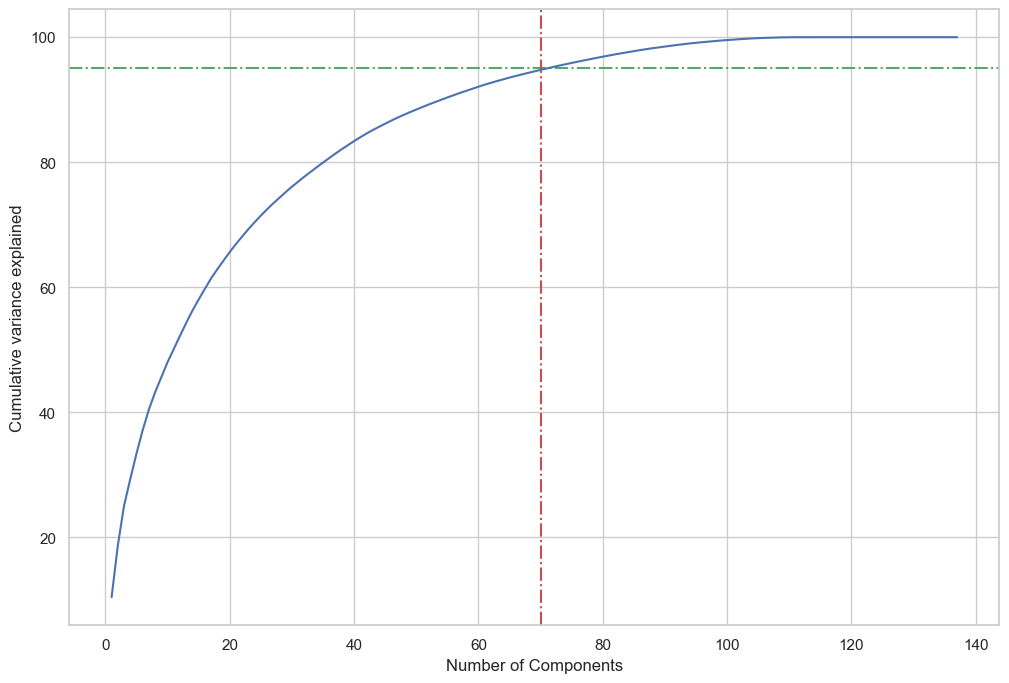

In [86]:
# # Plotting scree plot
fig = plt.figure(figsize=[12,8])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")
plt.show()

<a>As per above looks like 70 components are enough to describe 95% of the variance in the dataset. We'll choose 70 components for our modeling

**Using incremental PCA for better efficiency**

In [87]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [88]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (38004, 137)
Size of dataset after PCA is: (38004, 70)


In [89]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.016 , min negative corr:  -0.017


<a>We can see from the above calculations that the correlation among the attributes is almost 0, we can proceed with these principal components.

*Applying transformation on the test set*


We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [90]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

# MODEL BUILDING

Now we build models based on this PCA transformed dataset to predict customer churn

## 1. Logistic regression with PCA

In [91]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [92]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [93]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [94]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6696 1447]
 [ 139  628]]
sensitivity 	 0.82
specificity 	 0.82
area under the curve 	 0.82


***Tuning hyperparameter C***


C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [95]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [96]:

# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [97]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.34,0.24,0.00,0.00,0.01,{'C': 0.01},0.91,0.91,0.91,0.90,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,0.26,0.03,0.00,0.00,0.10,{'C': 0.1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.37,0.10,0.01,0.00,1,{'C': 1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,4,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.42,0.15,0.01,0.01,10,{'C': 10},0.91,0.91,0.91,0.90,0.91,0.91,0.00,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.31,0.15,0.00,0.00,100,{'C': 100},0.91,0.91,0.91,0.90,0.91,0.91,0.00,2,0.91,0.91,0.91,0.91,0.91,0.91,0.00
5,0.27,0.02,0.00,0.00,1000,{'C': 1000},0.91,0.91,0.91,0.90,0.91,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00


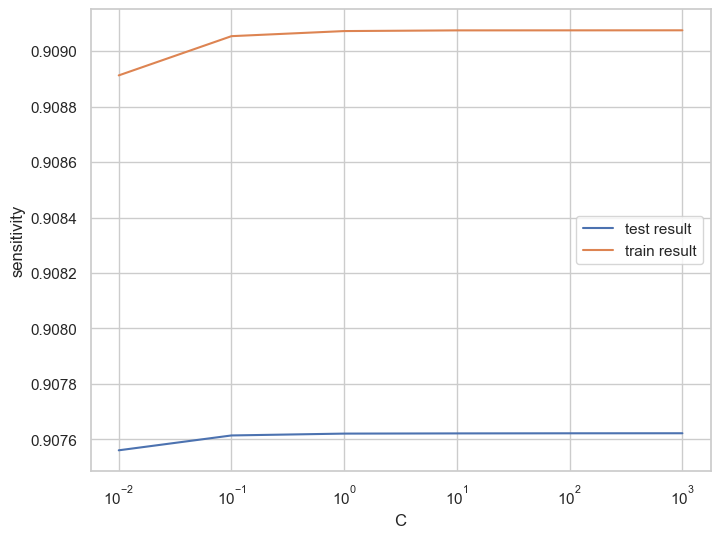

In [98]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [99]:

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9076219498149272 at C = 1000


**MODEL WITH OPTIMUM Paramaters**

In [100]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [101]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

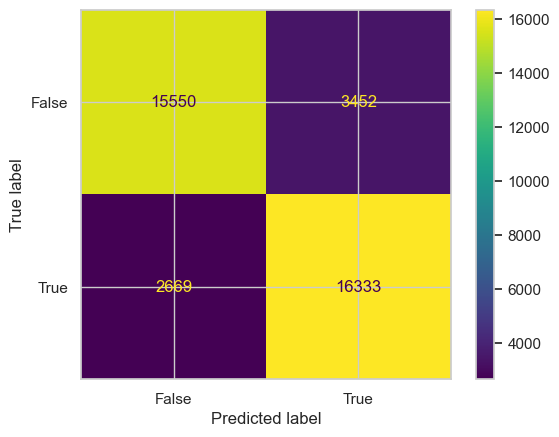

In [102]:
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()  

In [103]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [104]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))



Accuracy:- 0.8389380065256289
Sensitivity:- 0.8595411009367435
Specificity:- 0.8183349121145143
Recall:- 0.8595411009367435
AUC:    	 0.91


**Prediction on the test set**

In [105]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

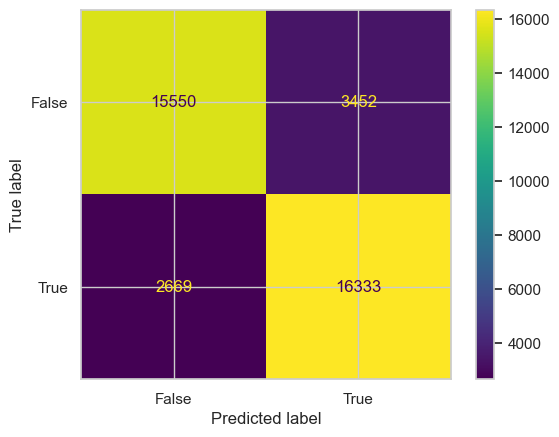

In [106]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [126]:
# Accuracy
print("Accuracy: ",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity: ",round(TP / float(TP+FN),2))

# Specificity
print("Specificity: ", round(TN / float(TN+FP),2))

# Recall
print("Recall: " , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:  0.84
Sensitivity:  0.87
Specificity:  0.87
Recall:  0.87
AUC:  0.89


Overall, it is evident that the model is applying the knowledge it gained from the TRAIN set to the TEST set with good performance.

*******************************************************************************************************************************************************************************************************************************

## 2. Decision tree with PCA

In [108]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Hyperparameter tuning**

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [110]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.87,0.02,0.00,0.00,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
1,0.85,0.00,0.00,0.00,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
2,0.84,0.01,0.00,0.00,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
3,0.84,0.00,0.00,0.00,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
4,1.42,0.01,0.00,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,2
5,1.42,0.02,0.00,0.00,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,1
6,1.35,0.02,0.00,0.00,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,4
7,1.34,0.01,0.00,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,3


In [111]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8404370041124911
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


**Model with optimal hyperparameters**

In [112]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

**Prediction on the train set**

In [113]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[16521,  2481],
       [ 2382, 16620]])

In [114]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:", round(TN / float(TN+FP),2))

# Recall
print("Recall:" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy: 0.87
Sensitivity: 0.87
Specificity: 0.87
Recall: 0.87
Area under curve is: 0.87


**Prediction on the test set**

In [118]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [119]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6903 1240]
 [ 229  538]]


In [120]:
# Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:", round(TN / float(TN+FP),2))

# Recall
print("Recall:" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy: 0.84
Sensitivity: 0.87
Specificity: 0.87
Recall: 0.87
Area under curve is: 0.77


## Model summary (Decesion Trees with PCA)

`Train set`
  * Accuracy = 0.87
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score = 0.87
  
  
`Test set`
  * Accuracy = 0.83
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score = 0.77

We can see from the model performance that the Sesitivity and Specificity remains same while evaluating the model on the test set and Train Set. However, the accuracy dropped a little in  TEST set but still it is quite good in the test set.


*******************************************************************************************************************************************************************************************************************************

## 3. Random forest with PCA

In [122]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [123]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [127]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [128]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [129]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      8143
           1       0.48      0.52      0.50       767

    accuracy                           0.91      8910
   macro avg       0.72      0.73      0.72      8910
weighted avg       0.91      0.91      0.91      8910



In [130]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[7711,  432],
       [ 371,  396]])

In [131]:
print(accuracy_score(y_test,predictions))

0.9098765432098765


The model looks good, let's now look at the list of hyperparameters which we can tune to improve model performance.

### Hyperparameter Tuning for Random Forest

***Tuning max_depth***

Looking at the optimum values for ```max_depth``` and See how the value of max_depth impacts the overall accuracy of the ensemble.


In [132]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9419007679045002
{'max_depth': 17}


In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.05,0.04,0.04,0.00,2,{'max_depth': 2},0.78,0.80,0.79,0.79,0.79,0.79,0.01,4,0.80,0.79,0.79,0.79,0.79,0.79,0.00
1,14.68,0.23,0.06,0.01,7,{'max_depth': 7},0.85,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,20.68,0.64,0.10,0.01,12,{'max_depth': 12},0.92,0.92,0.92,0.92,0.91,0.92,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,20.85,1.45,0.08,0.01,17,{'max_depth': 17},0.94,0.94,0.94,0.94,0.94,0.94,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


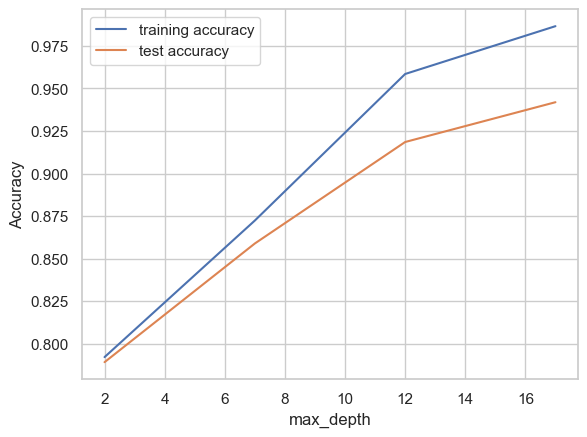

In [134]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We observe that both the test and train scores rise to a certain point as we increase the value of max_depth. As we increase the max_depth, the ensemble attempts to overfit.

Reducing overfitting in the forest can therefore be achieved by adjusting the depth of the component trees.

***Tuning n_estimators***

Now let's look at optimum values for n_estimators and see how the value of n_estimators impacts the overall accuracy. we'll specify an appropriately low value of max_depth, so that the trees do not overfit.
<br>


In [135]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8210978091525354
{'n_estimators': 1100}


In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.19,0.11,0.05,0.01,100,{'n_estimators': 100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
1,53.63,0.39,0.25,0.01,600,{'n_estimators': 600},0.81,0.83,0.82,0.82,0.82,0.82,0.01,2,0.83,0.82,0.82,0.82,0.82,0.82,0.00
2,82.18,7.82,0.32,0.03,1100,{'n_estimators': 1100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,1,0.83,0.82,0.82,0.82,0.82,0.82,0.00


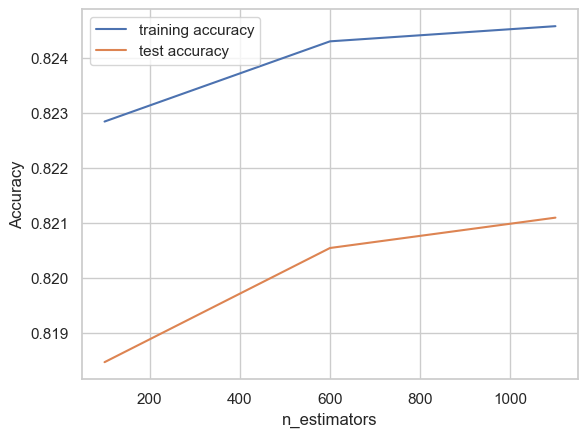

In [137]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***Tuning max_features***

We'll see the model performance varies with ```max_features```, which is the maximum numbre of features considered for splitting at a node.

In [138]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8242553334395059
{'max_features': 14}


In [139]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.89,0.04,0.05,0.01,4,{'max_features': 4},0.80,0.82,0.81,0.81,0.81,0.81,0.01,5,0.82,0.81,0.81,0.81,0.82,0.81,0.00
1,8.88,0.12,0.04,0.00,8,{'max_features': 8},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
2,14.95,0.03,0.05,0.01,14,{'max_features': 14},0.82,0.83,0.82,0.83,0.82,0.82,0.00,1,0.83,0.83,0.83,0.83,0.83,0.83,0.00
3,20.50,0.26,0.04,0.00,20,{'max_features': 20},0.81,0.82,0.81,0.82,0.82,0.82,0.01,4,0.82,0.82,0.82,0.82,0.82,0.82,0.00
4,21.45,1.56,0.03,0.00,24,{'max_features': 24},0.81,0.83,0.82,0.82,0.82,0.82,0.00,2,0.82,0.82,0.82,0.82,0.82,0.82,0.00


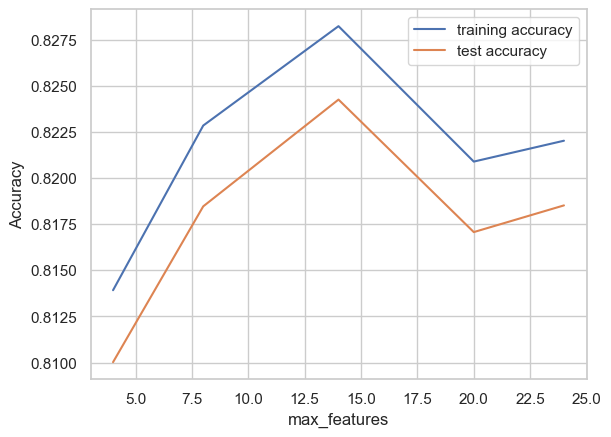

In [140]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***Tuning min_samples_leaf***

The hyperparameter **min_samples_leaf** is the minimum number of samples required to be at a leaf node:
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [141]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8536996032378011
{'min_samples_leaf': 100}


In [142]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,19.08,0.24,0.13,0.02,100,{'min_samples_leaf': 100},0.84,0.86,0.86,0.86,0.85,0.85,0.01,1,0.87,0.86,0.87,0.86,0.87,0.86,0.00
1,17.69,0.25,0.09,0.01,150,{'min_samples_leaf': 150},0.83,0.85,0.85,0.85,0.84,0.84,0.01,2,0.85,0.85,0.85,0.85,0.85,0.85,0.00
2,16.84,0.20,0.09,0.02,200,{'min_samples_leaf': 200},0.83,0.84,0.84,0.84,0.84,0.84,0.01,3,0.85,0.84,0.85,0.84,0.85,0.85,0.00
3,16.13,0.19,0.11,0.02,250,{'min_samples_leaf': 250},0.82,0.84,0.84,0.84,0.83,0.83,0.01,4,0.84,0.84,0.84,0.84,0.84,0.84,0.00
4,15.06,1.12,0.08,0.02,300,{'min_samples_leaf': 300},0.82,0.84,0.83,0.84,0.83,0.83,0.01,5,0.84,0.83,0.84,0.84,0.84,0.84,0.00


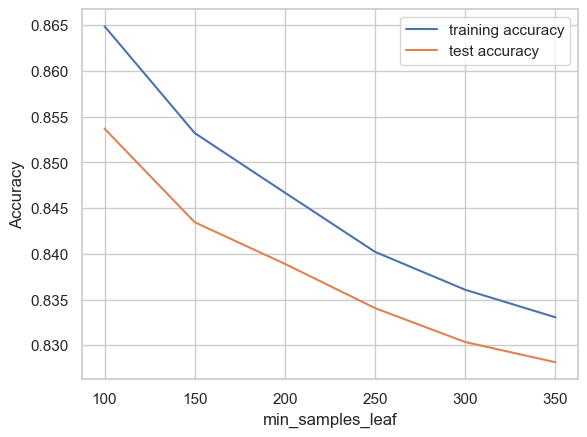

In [143]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see that the model starts to overfitying as you decrease the value of min_samples_leaf. 

***Tuning min_samples_split***

Checking the performance of the ensemble as we vary min_samples_split.

In [144]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8694348389062381
{'min_samples_split': 200}


In [145]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,24.35,0.34,0.10,0.01,200,{'min_samples_split': 200},0.86,0.88,0.87,0.87,0.87,0.87,0.01,1,0.89,0.89,0.89,0.89,0.89,0.89,0.00
1,23.06,0.72,0.09,0.01,250,{'min_samples_split': 250},0.85,0.87,0.86,0.86,0.86,0.86,0.01,2,0.88,0.88,0.88,0.88,0.88,0.88,0.00
2,21.53,0.17,0.09,0.00,300,{'min_samples_split': 300},0.84,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.88,0.87,0.00
3,20.98,0.31,0.10,0.02,350,{'min_samples_split': 350},0.84,0.86,0.85,0.86,0.85,0.85,0.01,4,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,19.93,1.20,0.08,0.01,400,{'min_samples_split': 400},0.84,0.86,0.85,0.85,0.85,0.85,0.01,5,0.86,0.86,0.86,0.86,0.86,0.86,0.00


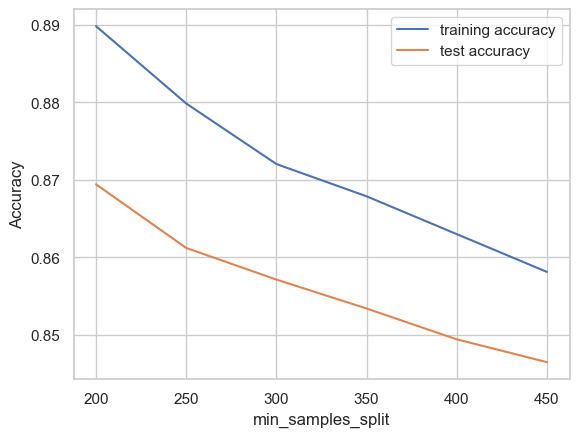

In [146]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Finally we find the optimal hyperparameters using GridSearchCV.

In [147]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [149]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [150]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8492790232607094 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


In [151]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [152]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=300, oob_score=True,
                       random_state=100)

In [153]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [154]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8143
           1       0.37      0.71      0.49       767

    accuracy                           0.87      8910
   macro avg       0.67      0.80      0.71      8910
weighted avg       0.92      0.87      0.89      8910



In [155]:
rfc.oob_score_

0.866093042837596

OOB Score tells how accuarte will be our model, we calculated the OOB score based on the train data set. Now, next we will also see the predictions and other metrics.

In [156]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity 
print("sensitivity:", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity:", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7232  911]
 [ 223  544]]
Accuracy: 0.87
sensitivity: 0.71
specificity: 0.89
AUC: 0.88


**Model summary** (Random Forest with PCA)

  * Accuracy =    0.87
  * Sensitivity = 0.70
  * Specificity = 0.89
  * AUC Score =   0.88

****************************************************************************************************************************************************************************

# Modelling without PCA

#### Logistic Regression without PCA

In [157]:

import statsmodels.api as sm

# Instantiate the model and also Adding the constant to X_train

log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

# Fitting the model
log_no_pca = log_no_pca.fit().summary()

# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37869
Model Family:                Binomial   Df Model:                          134
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       27114.
Time:                        22:14:19   Pearson chi2:                 2.71e+05
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.6395      0.050     12.699      0.000       0.541       0.738
arpu_6                                  0.2755      0.059      4.654      0.000       0.159       0.391
arpu_7                                  0.1043      0.062      1.685      0.092      -0.017       0.226
arpu_8                                  0.6615      0.078      8.483      0.000       0.509       0.814
onnet_mou_6                             9.1013      2.396      3.799      0.000       4.406      13.797
onnet_mou_7                            -5.3667      1.490     -3.602      0.000      -8.287      -2.446
onnet_mou_8                             2.2158      1.139      1.946      0.052      -0.016       4.447
offnet_mou_6                            9.6740      2.355      4.109      0.000       5.059      14.289
offnet_mou_7                           -5.6782      1.503     -3.778      0.000      -8.624      -2.733
offnet_mou_8                            1.0961      1.147      0.955      0.339      -1.153       3.345
roam_ic_mou_6                           0.1194      0.032      3.724      0.000       0.057       0.182
roam_ic_mou_7                          -0.0162      0.029     -0.558      0.577      -0.073       0.041
roam_ic_mou_8                           0.0156      0.027      0.573      0.566      -0.038       0.069
roam_og_mou_6                          -2.5230      0.610     -4.139      0.000      -3.718      -1.328
roam_og_mou_7                           1.4082      0.328      4.297      0.000       0.766       2.051
roam_og_mou_8                          -0.3799      0.293     -1.297      0.195      -0.954       0.194
loc_og_t2t_mou_6                     2173.4127    670.275      3.243      0.001     859.697    3487.128
loc_og_t2t_mou_7                      212.3681    644.281      0.330      0.742   -1050.399    1475.135
loc_og_t2t_mou_8                     7001.4028    588.628     11.894      0.000    5847.714    8155.092
loc_og_t2m_mou_6                     2165.1078    667.876      3.242      0.001     856.095    3474.121
loc_og_t2m_mou_7                      206.4843    626.621      0.330      0.742   -1021.670    1434.639
loc_og_t2m_mou_8                     7245.8990    609.130     11.895      0.000    6052.025    8439.773
loc_og_t2f_mou_6                      160.2053     49.409      3.242      0.001      63.366     257.044
loc_og_t2f_mou_7                       15.9871     49.095      0.326      0.745     -80.238     112.212
loc_og_t2f_mou_8                      567.4312     47.691     11.898      0.000     473.958     660.905
loc_og_t2c_mou_6                       -0.0341      0.023     -1.509      0.131      -0.078       0.010
loc_og_t2c_mou_7                        0.1623      0.027      6.05

1. As we see there are Many features with high p-values and hence those are insignificant for our model.
2. Also, there are few features with negative coefficients as well.

**Tuning the parameters**

First we will Select some of the features using RFE and then we will manually eleminate the remaining features based on p-values and VIF, untill we get a best model.

***Feature selection using RFE***

In [158]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

**Using RFE with 15 columns/features**

In [159]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train,y_train)

In [160]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'decrease_recharge_action', 'dec_avg_revenue_per_customer_action'],
      dtype='object')


### Model-1

In [161]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       30556.
Time:                        22:20:36   Pearson chi2:                 1.94e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4739      0.049      9.576      0.000       0.377       0.571
arpu_6                                  0.5393      0.023     23.797      0.000       0.495       0.584
onnet_mou_8                             1.3359      0.065     20.554      0.000       1.209       1.463
std_og_t2m_mou_8                        1.1846      0.059     20.141      0.000       1.069       1.300
og_others_8                            -6.8052      3.118     -2.183      0.029     -12.916      -0.694
total_og_mou_8                         -2.5263      0.099    -25.572      0.000      -2.720      -2.333
loc_ic_t2m_mou_7                        0.8600      0.040     21.648      0.000       0.782       0.938
loc_ic_t2m_mou_8                       -1.0917      0.092    -11.881      0.000      -1.272      -0.912
loc_ic_mou_8                           -0.4331      0.096     -4.534      0.000      -0.620      -0.246
total_ic_mou_8                         -0.7308      0.063    -11.671      0.000      -0.854      -0.608
total_rech_num_6                        0.3601      0.026     14.054      0.000       0.310       0.410
total_rech_num_8                       -0.8192      0.028    -29.645      0.000      -0.873      -0.765
last_day_rch_amt_8                     -0.5383      0.022    -24.327      0.000      -0.582      -0.495
max_rech_data_8                        -0.6509      0.021    -31.101      0.000      -0.692      -0.610
decrease_recharge_action               -0.7661      0.039    -19.434      0.000      -0.843      -0.689
dec_avg_revenue_per_customer_action    -0.7634      0.040    -19.020      0.000      -0.842      -0.685
=======================================================================================================
"""

In [162]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# FUNCTION FOR VIF calculation

def VIF_CALC(df):
    vif=pd.DataFrame()
    vif['Features']= df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif=vif.sort_values(by="VIF", ascending=False)
    return vif

In [163]:
VIF_CALC(X_train[rfe_cols])

,Features,VIF
4,total_og_mou_8,13.79
7,loc_ic_mou_8,8.71
1,onnet_mou_8,6.79
6,loc_ic_t2m_mou_8,5.79
8,total_ic_mou_8,5.70
2,std_og_t2m_mou_8,5.49
14,dec_avg_revenue_per_customer_action,3.45
13,decrease_recharge_action,3.40
5,loc_ic_t2m_mou_7,2.29
10,total_rech_num_8,1.83


Removing column total_rech_data_8, which is insignificatnt as it has very high p-value

In [171]:
# Removing total_rech_data_8 column 
log_cols = rfe_cols.to_list()
print(log_cols)
#log_cols.remove('total_rech_data_8')
#print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'decrease_recharge_action', 'dec_avg_revenue_per_customer_action']


### Model-2

In [168]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37988
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       30556.
Time:                        22:21:55   Pearson chi2:                 1.94e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4739      0.049      9.576      0.000       0.377       0.571
arpu_6                                  0.5393      0.023     23.797      0.000       0.495       0.584
onnet_mou_8                             1.3359      0.065     20.554      0.000       1.209       1.463
std_og_t2m_mou_8                        1.1846      0.059     20.141      0.000       1.069       1.300
og_others_8                            -6.8052      3.118     -2.183      0.029     -12.916      -0.694
total_og_mou_8                         -2.5263      0.099    -25.572      0.000      -2.720      -2.333
loc_ic_t2m_mou_7                        0.8600      0.040     21.648      0.000       0.782       0.938
loc_ic_t2m_mou_8                       -1.0917      0.092    -11.881      0.000      -1.272      -0.912
loc_ic_mou_8                           -0.4331      0.096     -4.534      0.000      -0.620      -0.246
total_ic_mou_8                         -0.7308      0.063    -11.671      0.000      -0.854      -0.608
total_rech_num_6                        0.3601      0.026     14.054      0.000       0.310       0.410
total_rech_num_8                       -0.8192      0.028    -29.645      0.000      -0.873      -0.765
last_day_rch_amt_8                     -0.5383      0.022    -24.327      0.000      -0.582      -0.495
max_rech_data_8                        -0.6509      0.021    -31.101      0.000      -0.692      -0.610
decrease_recharge_action               -0.7661      0.039    -19.434      0.000      -0.843      -0.689
dec_avg_revenue_per_customer_action    -0.7634      0.040    -19.020      0.000      -0.842      -0.685
=======================================================================================================
"""

In [169]:
# Checking VIF of Model-2

VIF_CALC(X_train[log_cols])

,Features,VIF
4,total_og_mou_8,13.79
7,loc_ic_mou_8,8.71
1,onnet_mou_8,6.79
6,loc_ic_t2m_mou_8,5.79
8,total_ic_mou_8,5.70
2,std_og_t2m_mou_8,5.49
14,dec_avg_revenue_per_customer_action,3.45
13,decrease_recharge_action,3.40
5,loc_ic_t2m_mou_7,2.29
10,total_rech_num_8,1.83


Removing column total_og_mou_8, which is insignificatnt as it has very high p-value and high VIF

In [172]:
# Removing total_og_mou_8 column 
log_cols.remove('total_og_mou_8')
print(log_cols)

['arpu_6', 'onnet_mou_8', 'std_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'total_ic_mou_8', 'total_rech_num_6', 'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8', 'decrease_recharge_action', 'dec_avg_revenue_per_customer_action']


### Model-3

In [173]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       31405.
Time:                        22:31:40   Pearson chi2:                 5.01e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4162      0.051      8.099      0.000       0.315       0.517
arpu_6                                  0.4829      0.022     22.435      0.000       0.441       0.525
onnet_mou_8                            -0.2477      0.018    -14.004      0.000      -0.282      -0.213
std_og_t2m_mou_8                       -0.2402      0.018    -13.192      0.000      -0.276      -0.204
og_others_8                            -7.3974      3.378     -2.190      0.029     -14.018      -0.776
loc_ic_t2m_mou_7                        0.9548      0.041     23.487      0.000       0.875       1.034
loc_ic_t2m_mou_8                       -1.7962      0.094    -19.126      0.000      -1.980      -1.612
loc_ic_mou_8                           -0.5738      0.099     -5.772      0.000      -0.769      -0.379
total_ic_mou_8                         -0.7557      0.063    -12.008      0.000      -0.879      -0.632
total_rech_num_6                        0.3986      0.025     15.640      0.000       0.349       0.449
total_rech_num_8                       -0.8603      0.027    -31.686      0.000      -0.914      -0.807
last_day_rch_amt_8                     -0.5612      0.022    -25.946      0.000      -0.604      -0.519
max_rech_data_8                        -0.6260      0.020    -30.570      0.000      -0.666      -0.586
decrease_recharge_action               -0.7970      0.039    -20.551      0.000      -0.873      -0.721
dec_avg_revenue_per_customer_action    -0.6811      0.039    -17.388      0.000      -0.758      -0.604
=======================================================================================================
"""

In [174]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_mou_8,8.69
7,total_ic_mou_8,5.70
5,loc_ic_t2m_mou_8,5.58
13,dec_avg_revenue_per_customer_action,3.44
12,decrease_recharge_action,3.39
4,loc_ic_t2m_mou_7,2.29
9,total_rech_num_8,1.78
8,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27


### Model-4

In [175]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
log_no_pca_4 = log_no_pca_4.fit()

log_no_pca_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       31405.
Time:                        22:33:25   Pearson chi2:                 5.01e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4162      0.051      8.099      0.000       0.315       0.517
arpu_6                                  0.4829      0.022     22.435      0.000       0.441       0.525
onnet_mou_8                            -0.2477      0.018    -14.004      0.000      -0.282      -0.213
std_og_t2m_mou_8                       -0.2402      0.018    -13.192      0.000      -0.276      -0.204
og_others_8                            -7.3974      3.378     -2.190      0.029     -14.018      -0.776
loc_ic_t2m_mou_7                        0.9548      0.041     23.487      0.000       0.875       1.034
loc_ic_t2m_mou_8                       -1.7962      0.094    -19.126      0.000      -1.980      -1.612
loc_ic_mou_8                           -0.5738      0.099     -5.772      0.000      -0.769      -0.379
total_ic_mou_8                         -0.7557      0.063    -12.008      0.000      -0.879      -0.632
total_rech_num_6                        0.3986      0.025     15.640      0.000       0.349       0.449
total_rech_num_8                       -0.8603      0.027    -31.686      0.000      -0.914      -0.807
last_day_rch_amt_8                     -0.5612      0.022    -25.946      0.000      -0.604      -0.519
max_rech_data_8                        -0.6260      0.020    -30.570      0.000      -0.666      -0.586
decrease_recharge_action               -0.7970      0.039    -20.551      0.000      -0.873      -0.721
dec_avg_revenue_per_customer_action    -0.6811      0.039    -17.388      0.000      -0.758      -0.604
=======================================================================================================
"""

In [176]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_mou_8,8.69
7,total_ic_mou_8,5.70
5,loc_ic_t2m_mou_8,5.58
13,dec_avg_revenue_per_customer_action,3.44
12,decrease_recharge_action,3.39
4,loc_ic_t2m_mou_7,2.29
9,total_rech_num_8,1.78
8,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27


### Model-5

In [178]:
# Adding constant to X_train
X_train_sm_5 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_5 = sm.GLM(y_train, X_train_sm_5, family=sm.families.Binomial())

# Fit the model
log_no_pca_5 = log_no_pca_5.fit()

log_no_pca_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       31405.
Time:                        22:33:50   Pearson chi2:                 5.01e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4162      0.051      8.099      0.000       0.315       0.517
arpu_6                                  0.4829      0.022     22.435      0.000       0.441       0.525
onnet_mou_8                            -0.2477      0.018    -14.004      0.000      -0.282      -0.213
std_og_t2m_mou_8                       -0.2402      0.018    -13.192      0.000      -0.276      -0.204
og_others_8                            -7.3974      3.378     -2.190      0.029     -14.018      -0.776
loc_ic_t2m_mou_7                        0.9548      0.041     23.487      0.000       0.875       1.034
loc_ic_t2m_mou_8                       -1.7962      0.094    -19.126      0.000      -1.980      -1.612
loc_ic_mou_8                           -0.5738      0.099     -5.772      0.000      -0.769      -0.379
total_ic_mou_8                         -0.7557      0.063    -12.008      0.000      -0.879      -0.632
total_rech_num_6                        0.3986      0.025     15.640      0.000       0.349       0.449
total_rech_num_8                       -0.8603      0.027    -31.686      0.000      -0.914      -0.807
last_day_rch_amt_8                     -0.5612      0.022    -25.946      0.000      -0.604      -0.519
max_rech_data_8                        -0.6260      0.020    -30.570      0.000      -0.666      -0.586
decrease_recharge_action               -0.7970      0.039    -20.551      0.000      -0.873      -0.721
dec_avg_revenue_per_customer_action    -0.6811      0.039    -17.388      0.000      -0.758      -0.604
=======================================================================================================
"""

In [179]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_mou_8,8.69
7,total_ic_mou_8,5.70
5,loc_ic_t2m_mou_8,5.58
13,dec_avg_revenue_per_customer_action,3.44
12,decrease_recharge_action,3.39
4,loc_ic_t2m_mou_7,2.29
9,total_rech_num_8,1.78
8,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27


### Model-6

In [181]:
# Adding constant to X_train
X_train_sm_6 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_6 = sm.GLM(y_train, X_train_sm_6, family=sm.families.Binomial())

# Fit the model
log_no_pca_6 = log_no_pca_6.fit()

log_no_pca_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             Prob_Churn   No. Observations:                38004
Model:                            GLM   Df Residuals:                    37989
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Tue, 10 Oct 2023   Deviance:                       31405.
Time:                        22:34:07   Pearson chi2:                 5.01e+08
No. Iterations:                    13   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   0.4162      0.051      8.099      0.000       0.315       0.517
arpu_6                                  0.4829      0.022     22.435      0.000       0.441       0.525
onnet_mou_8                            -0.2477      0.018    -14.004      0.000      -0.282      -0.213
std_og_t2m_mou_8                       -0.2402      0.018    -13.192      0.000      -0.276      -0.204
og_others_8                            -7.3974      3.378     -2.190      0.029     -14.018      -0.776
loc_ic_t2m_mou_7                        0.9548      0.041     23.487      0.000       0.875       1.034
loc_ic_t2m_mou_8                       -1.7962      0.094    -19.126      0.000      -1.980      -1.612
loc_ic_mou_8                           -0.5738      0.099     -5.772      0.000      -0.769      -0.379
total_ic_mou_8                         -0.7557      0.063    -12.008      0.000      -0.879      -0.632
total_rech_num_6                        0.3986      0.025     15.640      0.000       0.349       0.449
total_rech_num_8                       -0.8603      0.027    -31.686      0.000      -0.914      -0.807
last_day_rch_amt_8                     -0.5612      0.022    -25.946      0.000      -0.604      -0.519
max_rech_data_8                        -0.6260      0.020    -30.570      0.000      -0.666      -0.586
decrease_recharge_action               -0.7970      0.039    -20.551      0.000      -0.873      -0.721
dec_avg_revenue_per_customer_action    -0.6811      0.039    -17.388      0.000      -0.758      -0.604
=======================================================================================================
"""

In [182]:
VIF_CALC(X_train[log_cols])

,Features,VIF
6,loc_ic_mou_8,8.69
7,total_ic_mou_8,5.70
5,loc_ic_t2m_mou_8,5.58
13,dec_avg_revenue_per_customer_action,3.44
12,decrease_recharge_action,3.39
4,loc_ic_t2m_mou_7,2.29
9,total_rech_num_8,1.78
8,total_rech_num_6,1.65
0,arpu_6,1.37
1,onnet_mou_8,1.27


Here we see the p-values are in the Acceptable Range also the VIF's of all the values are also below 5 which is a good and acceptable range.

Hence **Model-6** will be the final Model

#### Model performance on the train set

In [183]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_6.predict(X_train_sm_6)
y_train_pred_no_pca.head()

0                   0.01
1                   0.13
2                   0.14
3                   0.04
4                   0.49
dtype: float64

In [184]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.01,0
1,0,0.13,1
2,0,0.14,2
3,0,0.04,3
4,0,0.49,4


Finding the Optimal Probablity CutOff Point.

In [185]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.01,0,1,0,0,0,0,0,0,0,0,0
1,0,0.13,1,1,1,0,0,0,0,0,0,0,0
2,0,0.14,2,1,1,0,0,0,0,0,0,0,0
3,0,0.04,3,1,0,0,0,0,0,0,0,0,0
4,0,0.49,4,1,1,1,1,1,0,0,0,0,0


Now Calculation of the accuracy sensitivity and specificity for various probability cutoffs.

In [186]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

              probability             accuracy          sensitivity  \
0.00                 0.00                 0.50                 1.00   
0.10                 0.10                 0.68                 0.97   
0.20                 0.20                 0.74                 0.95   
0.30                 0.30                 0.78                 0.93   
0.40                 0.40                 0.81                 0.89   
0.50                 0.50                 0.83                 0.85   
0.60                 0.60                 0.83                 0.79   
0.70                 0.70                 0.82                 0.71   
0.80                 0.80                 0.76                 0.56   
0.90                 0.90                 0.62                 0.25   

              specificity  
0.00                 0.00  
0.10                 0.38  
0.20                 0.53  
0.30                 0.64  
0.40                 0.73  
0.50                 0.81  
0.60                 0

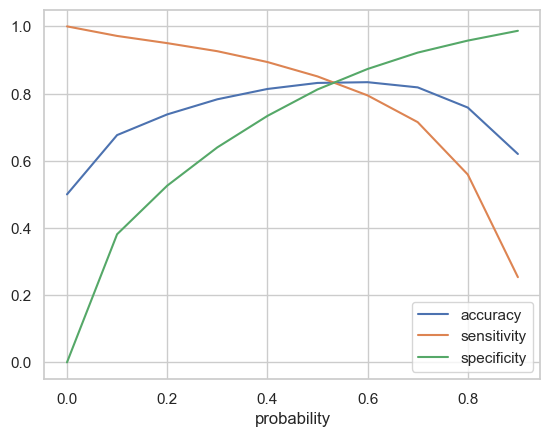

In [187]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

Analysis of the above curve

Accuracy - Becomes stable around 0.6 approx

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

Hence we consider cutoff point to be 0.6

In [188]:
# Creating a column with name "predicted", which is the predicted value for 0.6 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.01,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.13,1,1,1,0,0,0,0,0,0,0,0,0
2,0,0.14,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.04,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.49,4,1,1,1,1,1,0,0,0,0,0,0


***Evaluation Metrics***

In [189]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16593  2409]
 [ 3904 15098]]


In [190]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [192]:
# Accuracy
print("Accuracy:",round(metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']),2))

# Sensitivity
print("Sensitivity:",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:",round( TN / float(TN+FP),2))

# Recall
print("Recall:" , round(TP/float(TP+FN),2))

Accuracy: 0.83
Sensitivity: 0.79
Specificity: 0.87
Recall: 0.79


We can see we got good accuracy, sensitivity and specificity on the train set prediction.

In [193]:
# Plotting the ROC curve.

# ROC Curve function

def PLOT_ROC( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

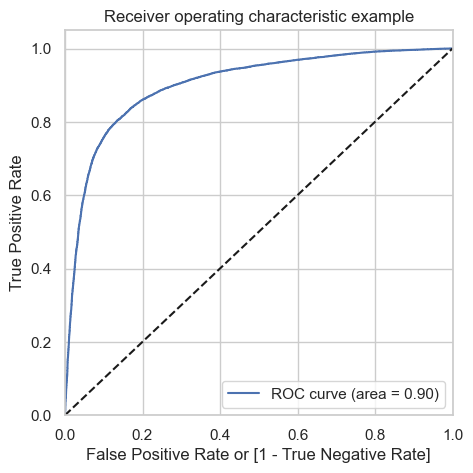

In [194]:

PLOT_ROC(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see from the curve we are getting a AUC value of 0.89 which is a very good value, there by indicating that we have a good predictive model.

#### Model Performance on the test set

In [195]:
# Taking a copy of the test set
X_test_log = X_test.copy()

# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [196]:
# Predict on the test set using the FINAL MODEL i.e MODEL-2
y_test_pred = log_no_pca_6.predict(X_test_sm)

y_test_pred.head()

2722                    0.47
28720                   0.02
43175                   0.12
50024                   0.98
37809                   0.09
dtype: float64

In [197]:
# Converting y_test_pred to a dataframe
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
2722,0.47
28720,0.02
43175,0.12
50024,0.98
37809,0.09


In [198]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Prob_Churn
2722,0
28720,0
43175,0
50024,1
37809,0


In [199]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [200]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [201]:
# Concatinating y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,Prob_Churn,CustID,0
0,0,2722,0.47
1,0,28720,0.02
2,0,43175,0.12
3,1,50024,0.98
4,0,37809,0.09


In [202]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

y_test_pred_final.head()

,Prob_Churn,CustID,churn_prob
0,0,2722,0.47
1,0,28720,0.02
2,0,43175,0.12
3,1,50024,0.98
4,0,37809,0.09


In [203]:
# In the test set using optimal probablity cutoff 0.6, that we considered previously. 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.6 else 0)

y_test_pred_final.head()

,Prob_Churn,CustID,churn_prob,test_predicted
0,0,2722,0.47,0
1,0,28720,0.02,0
2,0,43175,0.12,0
3,1,50024,0.98,1
4,0,37809,0.09,0


***EVALUATION METRICS***

In [205]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Prob_Churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[7182  961]
 [ 182  585]]


In [207]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test_pred_final['Prob_Churn'], y_test_pred_final['test_predicted']),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))


Accuracy:- 0.87
Sensitivity:- 0.79
Specificity:- 0.87
Recall:- 0.79


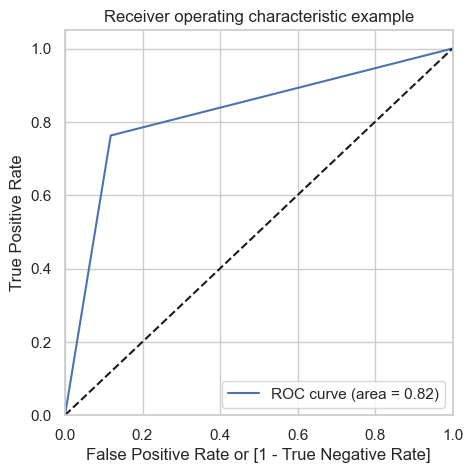

In [212]:
PLOT_ROC(y_test_pred_final['Prob_Churn'], y_test_pred_final['test_predicted'])

We can see we from the above ROC plot we get AUC of 0.76.

**Model summary** (Logistic Regression Without PCA)

`Train set`
  * Accuracy = 0.80
  * Sensitivity = 0.882
  * Specificity = 0.79
  * Recall = 0.82  


`Test set`
  * Accuracy = 0.79
  * Sensitivity = 0.82
  * Specificity = 0.79
  * Recall = 0.82

In [213]:
model_stats = pd.DataFrame(
    {'model':['Logistic Regression with PCA','Decision Tree with PCA','Random Forest with PCA','Logistic without PCA'],
                      
    'Recall':       [0.87,0.89,0.70,0.82],
    'Test accuracy':     [0.83,0.83,0.87,0.79],
    'Roc_auc_score':[0.88,0.77,0.88,0.76],
    })

model_stats.sort_values(by=['Recall','Test accuracy','Roc_auc_score'],ascending=False)

,model,Recall,Test accuracy,Roc_auc_score
1,Decision Tree with PCA,0.89,0.83,0.77
0,Logistic Regression with PCA,0.87,0.83,0.88
3,Logistic without PCA,0.82,0.79,0.76
2,Random Forest with PCA,0.70,0.87,0.88


In [214]:
features = dt_pca_model.feature_importances_
cols =[X.iloc[:,sorted(range(len(features)), key=lambda i: features[i])[-10:]].columns]
                
cols


[Index(['onnet_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_7', 'roam_ic_mou_7',
        'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7', 'onnet_mou_8',
        'roam_og_mou_8', 'arpu_6'],
       dtype='object')]

In [215]:
Imp_Features=pd.DataFrame({'FEATURES':['loc_og_t2m_mou_7', 'total_og_mou_6', 'loc_og_t2t_mou_7',
        'roam_ic_mou_7', 'onnet_mou_7', 'arpu_7', 'loc_og_t2c_mou_7',
        'onnet_mou_8', 'roam_og_mou_8', 'arpu_6']})
Imp_Features

,FEATURES
0,loc_og_t2m_mou_7
1,total_og_mou_6
2,loc_og_t2t_mou_7
3,roam_ic_mou_7
4,onnet_mou_7
5,arpu_7
6,loc_og_t2c_mou_7
7,onnet_mou_8
8,roam_og_mou_8
9,arpu_6


     ******************************************************

# Conclusion and STRATEGY ahead

1. According to EDA, we have seen a significant decrease in recharge, call, and data usage during the Action Phase, which lasts for the eighth month. Here are the salient characteristics:
- loc_og_t2m_mou_7
- total_og_mou_6
- loc_og_t2t_mou_7
- roam_ic_mou_7
- onnet_mou_7
- arpu_7
- loc_og_t2c_mou_7
- onnet_mou_8
- roam_og_mou_8
- arpu_6

2. The 7th month average revenue per user is a key factor in determining churn. If there is a sudden decline, it could be a sign that the customer is considering leaving, in which case appropriate action should be done.

3. The factors that have the biggest impact on customer attrition are local minutes of usage (outgoing).

4. Roaming Features related to customer churn are also impacted by minutes of usage, both inbound and outbound.

5. Another significant factor influencing the churn is the total minutes of usage for outgoing.
 

The following tactics can be used:

1. Unsatisfactory customer service, a bad network, or inappropriate customer schemes or plans could be the cause of a sudden drop in local minute usage. A stronger network will be provided, with an emphasis on client satisfaction. Routine feedback calls should be made for customer satisfaction and services that can understand their grievances & expectations, based on usage, last recharge, and onnet usage. It is necessary to take the proper measures to prevent them from churning.

2. Routine feedback calls should be made for customer satisfaction and services that can understand their grievances & expectations, based on usage, last recharge, and onnet usage. It is necessary to take the proper measures to prevent them from churning.

3. Customers can be enticed with a variety of appealing offers by demonstrating a sharp decline in the total amount spent on calls and data recharge during the action phase.

4. To prevent them from churning, such customers should be offered customised plans.Promotional offers are also quite beneficial.
